## New EDA

In [2]:
pip install -r requirements.txt

  Using cached spotipy-2.22.1-py3-none-any.whl (28 kB)
  Using cached pandas-2.0.1-cp310-cp310-win_amd64.whl (10.7 MB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached jupyterlab-4.0.2-py3-none-any.whl (9.2 MB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB 325.1 kB/s eta 0:00:26
                                              0.0/8.3 MB 325.1 kB/s eta 0:00:26
                                              0.0/8.3 MB 178.6 kB/s eta 0:00:47
                                              0.1/8.3 MB 251.0 kB/s eta 0:00:33
                                              0.1/8.3 MB 327.7 kB/s eta 0:00:26
                                              0.1/8.3 MB 363.1 kB/s eta 0:00:23
                                 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Cargamos el dataset completo
df_crudo = pd.read_csv('./datasets/tracks_audio_features.csv')

In [5]:
df_crudo.head()

,id,name,album_id,genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,000ETNHKRNLHNPjsCojYkc,Wargod,0i3dDHDl3RCfP1tEIqOx9h,"black-metal,death-metal,grindcore",0.525,0.8880,9,-9.505,1,0.0401,...,0.401000,0.0754,0.1470,99.938,audio_features,spotify:track:000ETNHKRNLHNPjsCojYkc,https://api.spotify.com/v1/tracks/000ETNHKRNLH...,https://api.spotify.com/v1/audio-analysis/000E...,278593,4
1,000N4CJL8IjQ0f2I4grgBO,Girl Next Door,1FLS0YAOPY3Mcb0o5n5fl4,"afrobeat,afrobeat",0.762,0.7310,1,-5.114,1,0.0501,...,0.000229,0.1730,0.5630,113.987,audio_features,spotify:track:000N4CJL8IjQ0f2I4grgBO,https://api.spotify.com/v1/tracks/000N4CJL8IjQ...,https://api.spotify.com/v1/audio-analysis/000N...,189568,4
2,000VZqvXwT0YNqKk7iG2GS,Mercy,75kQjmcR1YnIrBwVW1s4G1,metalcore,0.444,0.9910,7,-4.167,1,0.1330,...,0.000084,0.1200,0.1060,124.016,audio_features,spotify:track:000VZqvXwT0YNqKk7iG2GS,https://api.spotify.com/v1/tracks/000VZqvXwT0Y...,https://api.spotify.com/v1/audio-analysis/000V...,256478,4
3,000xQBsBOXGbHzbOwWsTua,Harmony in Blue I,1U5x6wQtMJtbwM3NZRSvKT,ambient,0.182,0.0513,8,-27.039,0,0.0415,...,0.810000,0.0900,0.0879,73.481,audio_features,spotify:track:000xQBsBOXGbHzbOwWsTua,https://api.spotify.com/v1/tracks/000xQBsBOXGb...,https://api.spotify.com/v1/audio-analysis/000x...,91827,5
4,001zs060RfeATbj7BFVwzS,Death Engine,3hKLQO8S8Kx5h1F06jed8r,industrial,0.556,0.9790,1,-7.121,0,0.0950,...,0.765000,0.3950,0.0394,143.029,audio_features,spotify:track:001zs060RfeATbj7BFVwzS,https://api.spotify.com/v1/tracks/001zs060RfeA...,https://api.spotify.com/v1/audio-analysis/001z...,647062,4


In [5]:
#Vemos los multigenero
def es_multi_genero(song):
  return len(set(song['genre'].split(','))) >1 

## Para cuando agreguemos mas generos

In [6]:
genres_selected = ["rock", "pop", "jazz", "hip-hop","classical"]

In [7]:
def clean_genre(song):
    
    if es_multi_genero(song):
        lista_multi = song['genre'].split(',')
        lista_multi2= list(set(lista_multi))
        for i,g in enumerate(lista_multi2):
            if g not in genres_selected:
                lista_multi2.pop(i)
        song['genre']=''.join(lista_multi2)
    return song
        

In [8]:
#Create list of multi genre songs
def create_list_multi_g(df):
    
    df2=df.apply(clean_genre, axis=1) 
    return df2

In [9]:
df_sin_multig=create_list_multi_g(df_crudo)

In [10]:
df_sin_multig.head(10)

,id,name,album_id,genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,000ETNHKRNLHNPjsCojYkc,Wargod,0i3dDHDl3RCfP1tEIqOx9h,grindcore,0.525,0.8880,9,-9.505,1,0.0401,...,0.401000,0.0754,0.1470,99.938,audio_features,spotify:track:000ETNHKRNLHNPjsCojYkc,https://api.spotify.com/v1/tracks/000ETNHKRNLH...,https://api.spotify.com/v1/audio-analysis/000E...,278593,4
1,000N4CJL8IjQ0f2I4grgBO,Girl Next Door,1FLS0YAOPY3Mcb0o5n5fl4,"afrobeat,afrobeat",0.762,0.7310,1,-5.114,1,0.0501,...,0.000229,0.1730,0.5630,113.987,audio_features,spotify:track:000N4CJL8IjQ0f2I4grgBO,https://api.spotify.com/v1/tracks/000N4CJL8IjQ...,https://api.spotify.com/v1/audio-analysis/000N...,189568,4
2,000VZqvXwT0YNqKk7iG2GS,Mercy,75kQjmcR1YnIrBwVW1s4G1,metalcore,0.444,0.9910,7,-4.167,1,0.1330,...,0.000084,0.1200,0.1060,124.016,audio_features,spotify:track:000VZqvXwT0YNqKk7iG2GS,https://api.spotify.com/v1/tracks/000VZqvXwT0Y...,https://api.spotify.com/v1/audio-analysis/000V...,256478,4
3,000xQBsBOXGbHzbOwWsTua,Harmony in Blue I,1U5x6wQtMJtbwM3NZRSvKT,ambient,0.182,0.0513,8,-27.039,0,0.0415,...,0.810000,0.0900,0.0879,73.481,audio_features,spotify:track:000xQBsBOXGbHzbOwWsTua,https://api.spotify.com/v1/tracks/000xQBsBOXGb...,https://api.spotify.com/v1/audio-analysis/000x...,91827,5
4,001zs060RfeATbj7BFVwzS,Death Engine,3hKLQO8S8Kx5h1F06jed8r,industrial,0.556,0.9790,1,-7.121,0,0.0950,...,0.765000,0.3950,0.0394,143.029,audio_features,spotify:track:001zs060RfeATbj7BFVwzS,https://api.spotify.com/v1/tracks/001zs060RfeA...,https://api.spotify.com/v1/audio-analysis/001z...,647062,4
5,0024tEymsoc9FyKUauQngQ,To the Unknown Man,6Tz3gRyPvHv8eDT5RZ2xXX,new-age,0.305,0.2340,1,-18.255,1,0.0259,...,0.929000,0.1320,0.0780,82.453,audio_features,spotify:track:0024tEymsoc9FyKUauQngQ,https://api.spotify.com/v1/tracks/0024tEymsoc9...,https://api.spotify.com/v1/audio-analysis/0024...,546107,3
6,002LzF75tglGIYV440tPnl,Shore,2FOwdDLmFPT7mrPd1O53nr,new-age,0.516,0.0183,9,-29.544,1,0.0605,...,0.959000,0.0974,0.3200,62.210,audio_features,spotify:track:002LzF75tglGIYV440tPnl,https://api.spotify.com/v1/tracks/002LzF75tglG...,https://api.spotify.com/v1/audio-analysis/002L...,139688,4
7,002YdWxaenIUL4PHiv5EB5,Eccentric Man - 2003 Remastered Version,0YnFiCAP5cvIJe6dEQPfzo,british,0.496,0.7340,0,-8.522,1,0.0452,...,0.058300,0.2440,0.6390,110.024,audio_features,spotify:track:002YdWxaenIUL4PHiv5EB5,https://api.spotify.com/v1/tracks/002YdWxaenIU...,https://api.spotify.com/v1/audio-analysis/002Y...,304933,4
8,003CpLpVCGuyfZe4dLB1No,Pégate,28NfWdCACj7M0DpWgxz3FI,reggae,0.696,0.7320,1,-6.526,1,0.0904,...,0.000000,0.1090,0.4830,101.788,audio_features,spotify:track:003CpLpVCGuyfZe4dLB1No,https://api.spotify.com/v1/tracks/003CpLpVCGuy...,https://api.spotify.com/v1/audio-analysis/003C...,120000,4
9,003FTlCpBTM4eSqYSWPv4H,"Swing, Swing",0TvOeelcHQXYgPcyQiLhyR,punk-rock,0.553,0.7170,7,-5.857,1,0.0318,...,0.128000,0.0385,0.3180,127.947,audio_features,spotify:track:003FTlCpBTM4eSqYSWPv4H,https://api.spotify.com/v1/tracks/003FTlCpBTM4...,https://api.spotify.com/v1/audio-analysis/003F...,233267,4


In [10]:
df_sin_multig = df_sin_multig[df_sin_multig['genre'].isin(genres_selected)]

In [13]:
df_sin_multig.head()

,id,name,album_id,genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
15,005lwxGU1tms6HGELIcUv9,I Kissed A Girl,0r2BUyPTmpbfuz4rR39mLl,pop,0.699,0.7600,5,-3.173,1,0.0677,...,0.000000,0.1320,0.6960,129.996,audio_features,spotify:track:005lwxGU1tms6HGELIcUv9,https://api.spotify.com/v1/tracks/005lwxGU1tms...,https://api.spotify.com/v1/audio-analysis/005l...,179640,4
18,007kRcQoBb4BN9GywpeJAa,Solo,0nZn0G4LOzU6G4ProRExYy,rock,0.612,0.9410,10,-6.153,0,0.0444,...,0.000335,0.0973,0.7740,120.064,audio_features,spotify:track:007kRcQoBb4BN9GywpeJAa,https://api.spotify.com/v1/tracks/007kRcQoBb4B...,https://api.spotify.com/v1/audio-analysis/007k...,174048,4
28,00CXUMREit80f2McJsjcIz,"Lieder ohne Worte (Songs without Words), Book ...",4oPL5qL3uEurG2nu1MsVwT,classical,0.355,0.0164,3,-28.659,1,0.0396,...,0.926000,0.0986,0.0922,67.946,audio_features,spotify:track:00CXUMREit80f2McJsjcIz,https://api.spotify.com/v1/tracks/00CXUMREit80...,https://api.spotify.com/v1/audio-analysis/00CX...,282813,4
50,00MDdSPO6iWPZwwuF6RH89,Fluster,5zDXxceLBK4Ojz08uNZ2KB,jazz,0.504,0.1660,0,-14.374,1,0.0441,...,0.047300,0.1080,0.2650,120.511,audio_features,spotify:track:00MDdSPO6iWPZwwuF6RH89,https://api.spotify.com/v1/tracks/00MDdSPO6iWP...,https://api.spotify.com/v1/audio-analysis/00MD...,211958,4
67,00TU7szqwBrxWTd9SO7ihK,Ella Uso Mi Cabeza Como Un Revolver - MTV Unpl...,5RJLKN7ucuVaRAUzNKtKB8,rock,0.396,0.7640,0,-7.348,0,0.0342,...,0.012800,0.7080,0.2360,82.858,audio_features,spotify:track:00TU7szqwBrxWTd9SO7ihK,https://api.spotify.com/v1/tracks/00TU7szqwBrx...,https://api.spotify.com/v1/audio-analysis/00TU...,364493,4


In [14]:
df_sin_multig.shape

(2649, 21)

In [17]:
df_sin_multig['genre'].value_counts()

genre
jazz         708
classical    674
hip-hop      549
rock         374
pop          344
Name: count, dtype: int64

In [11]:
df_sin_multig['key']=df_sin_multig.key.apply(lambda x: str(x))
df_sin_multig['time_signature']=df_sin_multig.time_signature.apply(str)
df_sin_multig.drop(df_sin_multig[df_sin_multig['time_signature']=='0'].index,inplace=True) #son 3 rancias

In [12]:
included_types = ['float64', 'int64']
selected_columns = df_sin_multig.select_dtypes(include=included_types).columns
selected_variables = df_sin_multig[selected_columns]

### Normalizacion de unidades

In [13]:
#Normalizo la variable ms a segundos
selected_variables['duration_ms'] = selected_variables['duration_ms']/60000  

#Normalizo la variable loudness
#selected_variables['loudness'] = selected_variables['loudness']/60


#normalizo la variable tempo
selected_variables['tempo'] = selected_variables['tempo']/100

C:\Users\admin\AppData\Local\Temp\ipykernel_13676\596261255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables['duration_ms'] = selected_variables['duration_ms']/60000
C:\Users\admin\AppData\Local\Temp\ipykernel_13676\596261255.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_variables['tempo'] = selected_variables['tempo']/100


In [26]:
selected_variables.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
15,0.699,0.7600,-3.173,1,0.0677,0.00223,0.000000,0.1320,0.6960,1.29996,2.994000
18,0.612,0.9410,-6.153,0,0.0444,0.02650,0.000335,0.0973,0.7740,1.20064,2.900800
28,0.355,0.0164,-28.659,1,0.0396,0.99500,0.926000,0.0986,0.0922,0.67946,4.713550
50,0.504,0.1660,-14.374,1,0.0441,0.98600,0.047300,0.1080,0.2650,1.20511,3.532633
67,0.396,0.7640,-7.348,0,0.0342,0.00284,0.012800,0.7080,0.2360,0.82858,6.074883


## Matriz de correlación

## PCA 2

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Standardize the Data
scaler = StandardScaler()
selected_variables_scaled = scaler.fit_transform(selected_variables)



In [15]:
colormaping = df_sin_multig['genre']

#Coloreo a los componetes de genero
#list_generos =list(colormaping.unique())

#Usemos la lista con la que filtramos los generos! genres_selected
list_generos = genres_selected #lo pongo asi por si pinta volver atras



colors = plt.cm.rainbow(np.linspace(0, 1, len(list_generos)))
df_sin_multig['color'] = colormaping.apply(lambda x: colors[list_generos.index(x)])



In [25]:
#Ver que onda con los colores, cual es cual y poner legends en los graficos
#Tambien queria hacer el PCA 5

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

C:\Users\admin\AppData\Local\Temp\ipykernel_13676\780694108.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


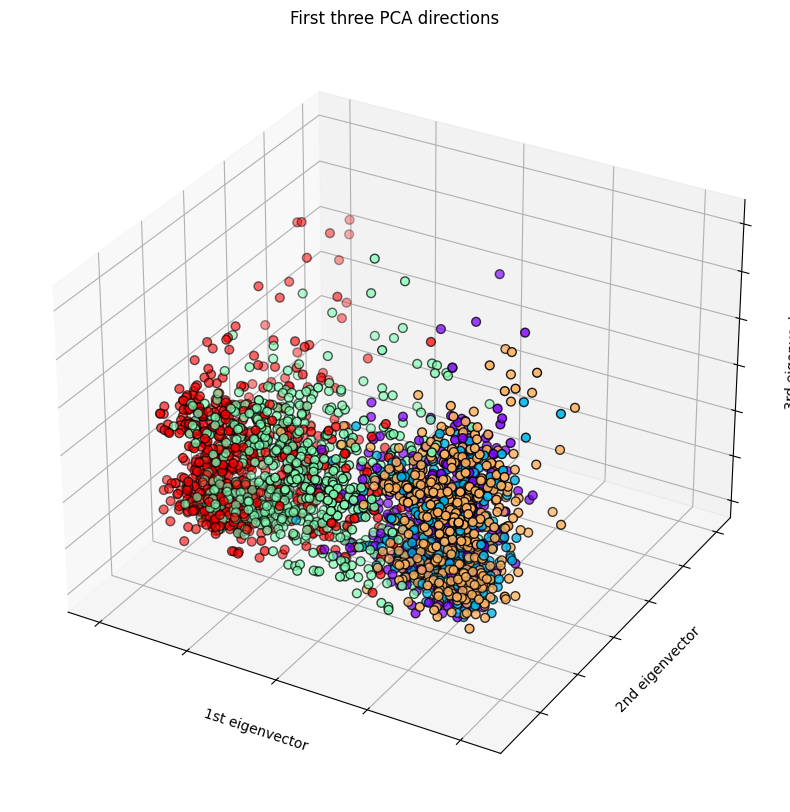

In [24]:
#Create a 3d graph for the features in X_pca
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

X_pca =  PCA(n_components=3).fit_transform(selected_variables_scaled)
ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=df_sin_multig['color'],#Agrego colores
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_13676\1318806688.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


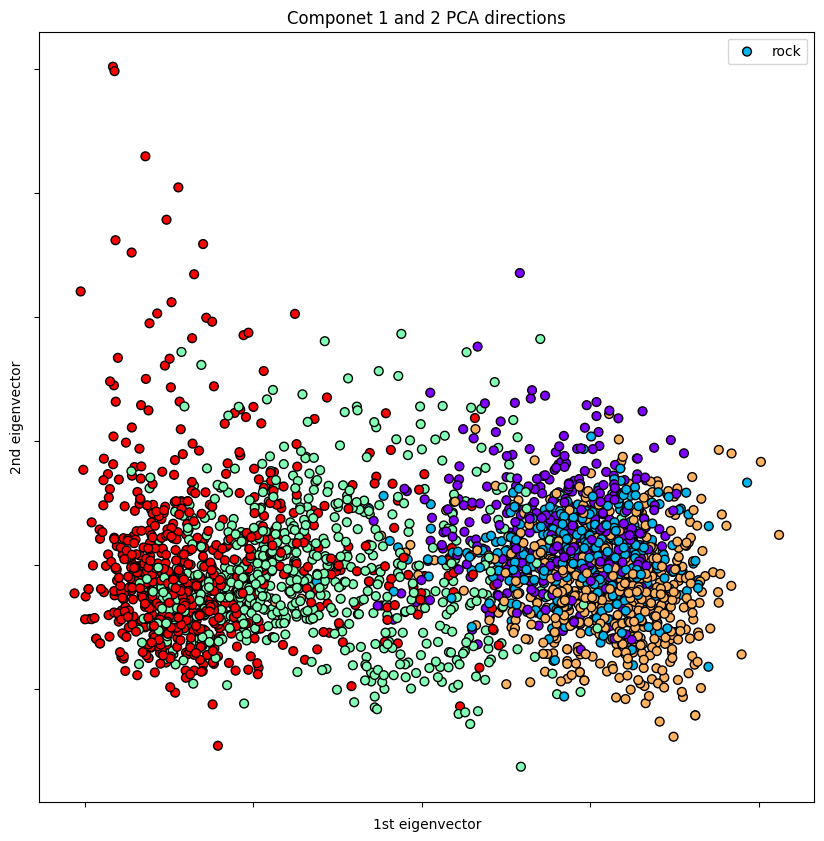

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    #X_pca[:, 2],
    c=df_sin_multig['color'],#Agrego colores
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("Componet 1 and 2 PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.legend(tuple(genres_selected))
plt.show()

/tmp/ipykernel_12802/54983562.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


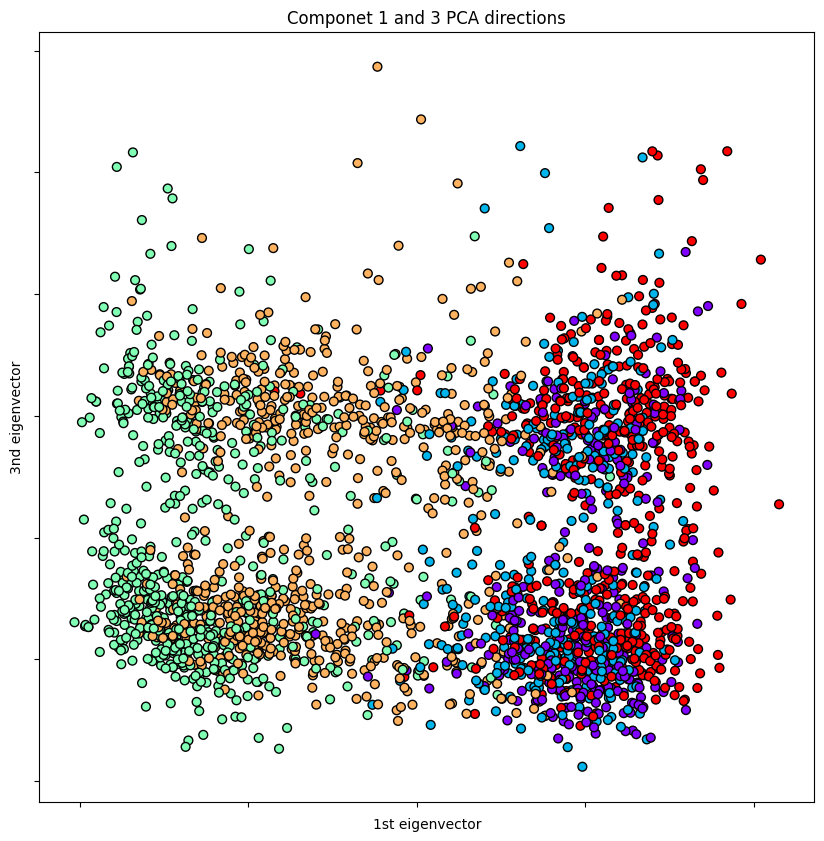

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


ax.scatter(
    X_pca[:, 0],
    #X_pca[:, 1],
    X_pca[:, 2],
    c=df_sin_multig['color'],#Agrego colores
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("Componet 1 and 3 PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("3nd eigenvector")
ax.yaxis.set_ticklabels([])
plt.show()

/tmp/ipykernel_12802/4156931878.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


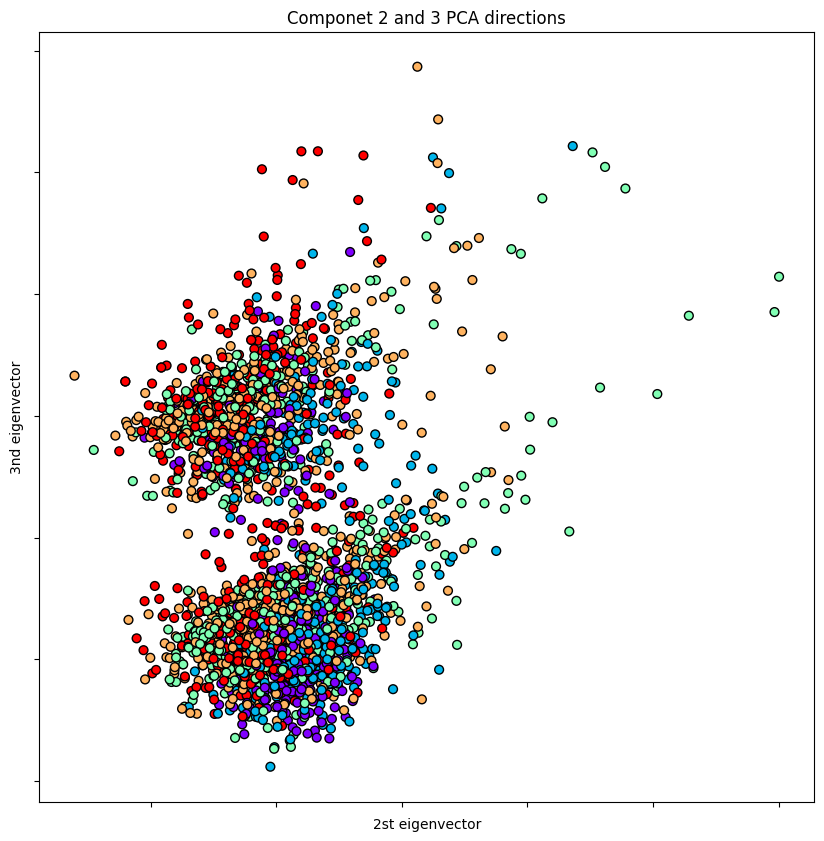

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


ax.scatter(
    #X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=df_sin_multig['color'],#Agrego colores
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("Componet 2 and 3 PCA directions")
ax.set_xlabel("2st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("3nd eigenvector")
ax.yaxis.set_ticklabels([])
plt.show()